In [12]:
%matplotlib inline

# http://aimotion.blogspot.com.br/2011/10/machine-learning-with-python-linear.html
    
import numpy as np
from numpy import loadtxt, zeros, ones, array, linspace, logspace, mean, std, arange
import matplotlib.pyplot as plt
from pylab import plot, show, xlabel, ylabel


d = zeros([20,3])

d[:,0] = np.random.uniform(0,10,20)
d[:,1] = np.random.uniform(0,10,20)

d[:,2] = 20 + d[:,0] * 3  + d[:,1] * 15 + np.random.uniform(0,2,20)

print(d)


[[   7.80217906    1.32747729   64.50541548]
 [   3.30739675    2.03097885   61.89386087]
 [   4.22246735    2.45897426   70.57287152]
 [   0.80119959    2.29879698   57.49749148]
 [   6.91348574    6.23884373  134.98260982]
 [   0.57938083    3.40056042   74.47400505]
 [   5.11456465    6.98785566  141.6343735 ]
 [   3.80972752    0.76468958   43.71504184]
 [   3.05508571    5.30783529  110.21553889]
 [   0.63439613    7.45960983  135.1127875 ]
 [   1.32561835    3.46194813   76.9605596 ]
 [   6.56649814    4.54361713  108.78915387]
 [   4.29043639    0.51977052   41.37029171]
 [   7.75606154    7.19005225  151.95410119]
 [   8.57429272    0.77886435   58.83966157]
 [   1.1380938     3.68301945   79.34253533]
 [   9.1110878     5.7780766   135.05111997]
 [   6.24587752    4.63047354  108.54801021]
 [   3.72137753    9.84212436  180.33101802]
 [   7.58990151    6.63380213  142.35617873]]


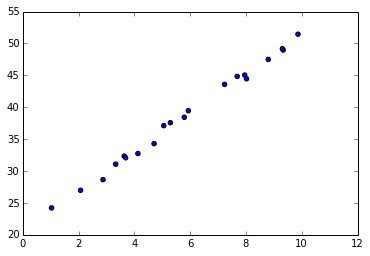

In [3]:
scatter(d[:,0],d[:,1], marker='o', c='b')
#title('Profits distribution')
#xlabel('Population of City in 10,000s')
#ylabel('Profit in $10,000s')
show()

In [13]:
#Evaluate the linear regression
def feature_normalize(X):
    '''
    Returns a normalized version of X where
    the mean value of each feature is 0 and the standard deviation
    is 1. This is often a good preprocessing step to do when
    working with learning algorithms.
    '''
    mean_r = []
    std_r = []

    X_norm = X

    n_c = X.shape[1]
    for i in range(n_c):
        m = mean(X[:, i])
        s = std(X[:, i])
        mean_r.append(m)
        std_r.append(s)
        X_norm[:, i] = (X_norm[:, i] - m) / s

    return X_norm, mean_r, std_r

def compute_cost(X, y, theta):
    '''
    Comput cost for linear regression
    '''
    #Number of training samples
    m = y.size

    predictions = X.dot(theta)

    sqErrors = (predictions - y)

    J = (1.0 / (2 * m)) * sqErrors.T.dot(sqErrors)

    return J


def gradient_descent(X, y, theta, alpha, num_iters):
    '''
    Performs gradient descent to learn theta
    by taking num_items gradient steps with learning
    rate alpha
    '''
    m = y.size
    J_history = zeros(shape=(num_iters, 1))

    for i in range(num_iters):

        predictions = X.dot(theta)

        theta_size = theta.size

        for it in range(theta_size):

            temp = X[:, it]
            temp.shape = (m, 1)

            errors_x1 = (predictions - y) * temp

            theta[it][0] = theta[it][0] - alpha * (1.0 / m) * errors_x1.sum()

        J_history[i, 0] = compute_cost(X, y, theta)

    return theta, J_history


In [17]:
X = d[:, :2]
y = d[:, 2]


#number of training samples
m = y.size
print("m",m)

y.shape = (m, 1)

#Scale features and set them to zero mean
x, mean_r, std_r = feature_normalize(X)

print(x)
print("mean",mean_r)
print("std",std_r)

('m', 20)
[[ 1.15066391 -1.14726561]
 [-0.4787063  -0.87268388]
 [-0.14699084 -0.70563418]
 [-1.38720925 -0.76815253]
 [ 0.82851029  0.76967616]
 [-1.46761913 -0.3381263 ]
 [ 0.17639674  1.06202092]
 [-0.2966101  -1.36692572]
 [-0.5701697   0.40629684]
 [-1.44767594  1.24614998]
 [-1.1971061  -0.31416624]
 [ 0.70272638  0.10801698]
 [-0.12235189 -1.46251939]
 [ 1.13394619  1.14093971]
 [ 1.43055711 -1.3613932 ]
 [-1.26508423 -0.22788051]
 [ 1.62514672  0.58983542]
 [ 0.58650058  0.14191767]
 [-0.3286372   2.1760626 ]
 [ 1.07371275  0.92383127]]
('mean', [1.1102230246251566e-17, 1.6653345369377347e-17])
('std', [1.0, 1.0])


In [33]:
#Add a column of ones to X (interception data)
it = ones(shape=(m, 3))
it[:, 1:3] = x

#Some gradient descent settings
iterations = 10000
alpha = 0.001

#Init Theta and Run Gradient Descent
theta = zeros(shape=(3, 1))

print(theta)

[[ 0.]
 [ 0.]
 [ 0.]]


In [34]:
print(it)

[[ 1.          1.15066391 -1.14726561]
 [ 1.         -0.4787063  -0.87268388]
 [ 1.         -0.14699084 -0.70563418]
 [ 1.         -1.38720925 -0.76815253]
 [ 1.          0.82851029  0.76967616]
 [ 1.         -1.46761913 -0.3381263 ]
 [ 1.          0.17639674  1.06202092]
 [ 1.         -0.2966101  -1.36692572]
 [ 1.         -0.5701697   0.40629684]
 [ 1.         -1.44767594  1.24614998]
 [ 1.         -1.1971061  -0.31416624]
 [ 1.          0.70272638  0.10801698]
 [ 1.         -0.12235189 -1.46251939]
 [ 1.          1.13394619  1.14093971]
 [ 1.          1.43055711 -1.3613932 ]
 [ 1.         -1.26508423 -0.22788051]
 [ 1.          1.62514672  0.58983542]
 [ 1.          0.58650058  0.14191767]
 [ 1.         -0.3286372   2.1760626 ]
 [ 1.          1.07371275  0.92383127]]


In [35]:
theta, J_history = gradient_descent(it, y, theta, alpha, iterations)
print theta

print J_history


[[ 98.90286333]
 [  8.16889128]
 [ 38.45742573]]
[[  5.67712464e+03]
 [  5.66571880e+03]
 [  5.65433590e+03]
 ..., 
 [  8.37740977e-02]
 [  8.37740734e-02]
 [  8.37740491e-02]]


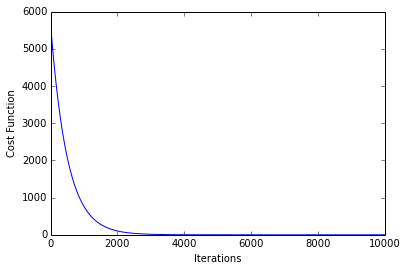

[ 1.          1.15066391 -1.14726561] -> [ 64.50541548] - [ 64.18162963]  diff:
[ 1.         -0.4787063  -0.87268388] -> [ 61.89386087] - [ 61.43118828]  diff:
[ 1.         -0.14699084 -0.70563418] -> [ 70.57287152] - [ 70.56523723]  diff:
[ 1.         -1.38720925 -0.76815253] -> [ 57.49749148] - [ 58.02973302]  diff:
[ 1.          0.82851029  0.76967616] -> [ 134.98260982] - [ 135.27063744]  diff:
[ 1.         -1.46761913 -0.3381263 ] -> [ 74.47400505] - [ 73.9105751]  diff:
[ 1.          0.17639674  1.06202092] -> [ 141.6343735] - [ 141.18641975]  diff:
[ 1.         -0.2966101  -1.36692572] -> [ 43.71504184] - [ 43.91144347]  diff:
[ 1.         -0.5701697   0.40629684] -> [ 110.21553889] - [ 109.87033968]  diff:
[ 1.         -1.44767594  1.24614998] -> [ 135.1127875] - [ 135.00067624]  diff:
[ 1.         -1.1971061  -0.31416624] -> [ 76.9605596] - [ 77.04180913]  diff:
[ 1.          0.70272638  0.10801698] -> [ 108.78915387] - [ 108.79741383]  diff:
[ 1.         -0.12235189 -1.462519

In [38]:
plot(arange(iterations), J_history)
xlabel('Iterations')
ylabel('Cost Function')
show()




In [67]:
for x1,y1 in zip(it,y):
    v = array(x1).dot(theta).flatten()
    print("{} -> {: >10.2f} - {: >10.2f}  diff:{: >10.2f}".format(x1,y1[0],v[0], y1[0] - v[0]))
    

[ 1.          1.15066391 -1.14726561] ->      64.51 -      64.18  diff:      0.32
[ 1.         -0.4787063  -0.87268388] ->      61.89 -      61.43  diff:      0.46
[ 1.         -0.14699084 -0.70563418] ->      70.57 -      70.57  diff:      0.01
[ 1.         -1.38720925 -0.76815253] ->      57.50 -      58.03  diff:     -0.53
[ 1.          0.82851029  0.76967616] ->     134.98 -     135.27  diff:     -0.29
[ 1.         -1.46761913 -0.3381263 ] ->      74.47 -      73.91  diff:      0.56
[ 1.          0.17639674  1.06202092] ->     141.63 -     141.19  diff:      0.45
[ 1.         -0.2966101  -1.36692572] ->      43.72 -      43.91  diff:     -0.20
[ 1.         -0.5701697   0.40629684] ->     110.22 -     109.87  diff:      0.35
[ 1.         -1.44767594  1.24614998] ->     135.11 -     135.00  diff:      0.11
[ 1.         -1.1971061  -0.31416624] ->      76.96 -      77.04  diff:     -0.08
[ 1.          0.70272638  0.10801698] ->     108.79 -     108.80  diff:     -0.01
[ 1.         -0.

In [74]:
v = array(it).dot(theta).flatten()
y.T.dot(v)

array([ 227528.63294492])